In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Create Dataset
df = pd.DataFrame({
    "patient_id": [101, 102, 103, 104, 105, 106, 107, 108],
    "age": [23, 45, 34, 67, None, 29, 51, 40],
    "gender": ["F", "M", "F", "M", "F", None, "M", "F"],
    "triage_level": [3, 2, 4, 1, 3, 5, None, 2],
    "wait_time_minutes": [25, 40, None, 10, 60, 90, 45, None],
    "appointment_status": ["Completed", "Completed", "No-Show", "Completed", "Completed", "No-Show", "Completed", "Completed"],
    "satisfaction_score": [4, 5, None, 3, 2, None, 5, 4]
})


In [3]:
#Inspect Dataset
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())


   patient_id   age gender  triage_level  wait_time_minutes  \
0         101  23.0      F           3.0               25.0   
1         102  45.0      M           2.0               40.0   
2         103  34.0      F           4.0                NaN   
3         104  67.0      M           1.0               10.0   
4         105   NaN      F           3.0               60.0   

  appointment_status  satisfaction_score  
0          Completed                 4.0  
1          Completed                 5.0  
2            No-Show                 NaN  
3          Completed                 3.0  
4          Completed                 2.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          8 non-null      int64  
 1   age                 7 non-null      float64
 2   gender              7 non-null      object 
 3   triage_level 

In [4]:
#Clean missing data
df["age"] = df["age"].fillna(df["age"].mean())
df["gender"] = df["gender"].fillna("Unknown")
df["triage_level"] = df["triage_level"].fillna(df["triage_level"].mode()[0])
df["wait_time_minutes"] = df["wait_time_minutes"].fillna(df["wait_time_minutes"].median())
df["satisfaction_score"] = df["satisfaction_score"].fillna(df["satisfaction_score"].median())


In [5]:
#Create Healthcare Metrics
#no-show rate
df["no_show"] = df["appointment_status"] == "No-Show"

#delay risk category
df["wait_risk"] = df["wait_time_minutes"].apply(
    lambda x: "High" if x > 45 else "Medium" if x > 20 else "Low"
)

#age group
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 40, 60, 100],
                         labels=["Child", "Adult", "Middle-Age", "Senior"])


In [6]:
#Analysis
#average wait time per triage level
df.groupby("triage_level")["wait_time_minutes"].mean()

#no-show rate
df["no_show"].mean()

#satisfaction by wait risk
df.groupby("wait_risk")["satisfaction_score"].mean()

#satisfaction by age group
df.groupby("age_group")["satisfaction_score"].mean()


/tmp/ipython-input-2702488270.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["satisfaction_score"].mean()


,satisfaction_score
age_group,
Child,NaN
Adult,4.0
Middle-Age,4.0
Senior,3.0


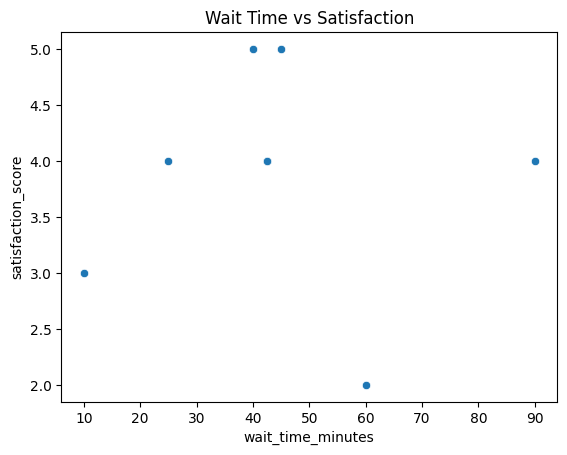

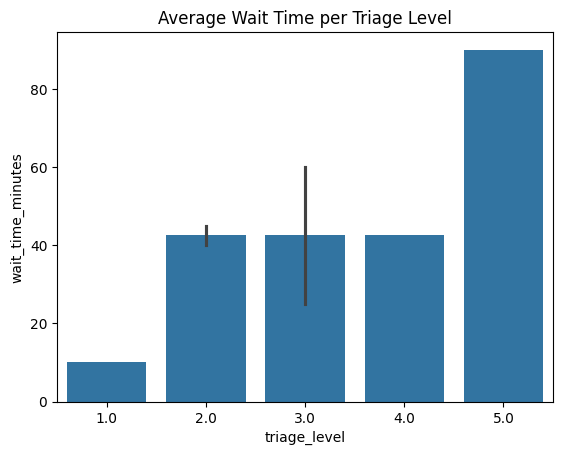

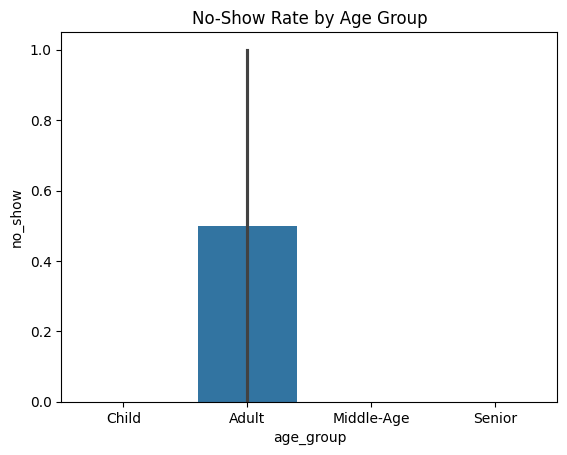

In [7]:
#Visualization

#wait time vs satisfaction
sns.scatterplot(x=df["wait_time_minutes"], y=df["satisfaction_score"])
plt.title("Wait Time vs Satisfaction")
plt.show()

#average wait time by triage
sns.barplot(x=df["triage_level"], y=df["wait_time_minutes"])
plt.title("Average Wait Time per Triage Level")
plt.show()

#no-show by age group
sns.barplot(x=df["age_group"], y=df["no_show"].astype(int))
plt.title("No-Show Rate by Age Group")
plt.show()



In [8]:
#Export Clean Data
df.to_csv("cleaned_healthcare_data.csv", index=False)
